In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
raw_df = pd.read_csv('wine_data.csv')
del raw_df['Unnamed: 0']
raw_df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
len(raw_df)

129971

In [4]:
len(raw_df[raw_df['country'] == 'US'])

54504

In [5]:
raw_df['points'].mean()

88.44713820775404

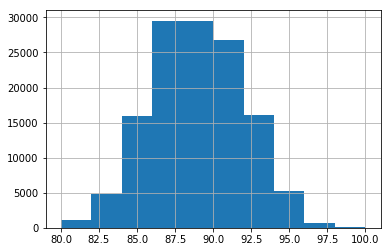

In [6]:
raw_df['points'].hist()
plt.show()

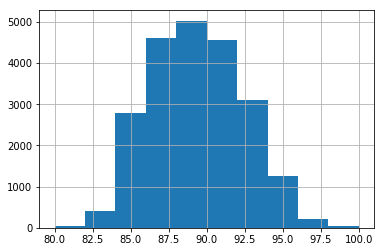

In [7]:
raw_df[raw_df['country'] == 'France']['points'].hist()
plt.show()

/home/aman/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


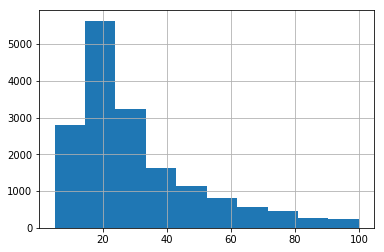

In [8]:
raw_df[raw_df['country'] == 'France'][raw_df['price'] <= 100]['price'].hist()
plt.show()

In [9]:
raw_df[['price', 'points']].corr()

,price,points
price,1.000000,0.416167
points,0.416167,1.000000


In [10]:
def word_count(sentence):
    counts = {}
    for word in sentence.split():
        counts[word] = counts.get(word, 0) + 1

    return counts
    
def update_word_count(sentence, current_counts):
    new_counts = word_count(sentence)
    for word, _ in new_counts.items():
        current_counts[word] = current_counts.get(word, 0) + 1

def get_idf(documents):
    word_counts = {}
    for doc in documents:
        update_word_count(doc, word_counts)    
    idf = {}
        
    N = len(documents)
    for word, count  in word_counts.items():
        idf[word] = math.log(N/count)
        
    return idf

In [11]:
sen1 = 'A The wine'
sen2 = 'is was wine'
counts = word_count(sen1)
update_word_count(sen2, counts)
counts

{'A': 1, 'The': 1, 'wine': 2, 'is': 1, 'was': 1}

In [12]:
idf_dict = get_idf(raw_df['description'])

In [13]:
print(idf_dict['a'])
print(idf_dict['tannins'])

0.30248410527633296
2.000833910950419


In [21]:
raw_df['tf'] = raw_df['description'].apply(word_count)
raw_df[['description', 'tf']].head(10)

,description,tf
0,"Aromas include tropical fruit, broom, brimston...","{'Aromas': 1, 'include': 1, 'tropical': 1, 'fr..."
1,"This is ripe and fruity, a wine that is smooth...","{'This': 1, 'is': 2, 'ripe': 1, 'and': 2, 'fru..."
2,"Tart and snappy, the flavors of lime flesh and...","{'Tart': 1, 'and': 2, 'snappy,': 1, 'the': 2, ..."
3,"Pineapple rind, lemon pith and orange blossom ...","{'Pineapple': 1, 'rind,': 1, 'lemon': 1, 'pith..."
4,"Much like the regular bottling from 2012, this...","{'Much': 1, 'like': 1, 'the': 1, 'regular': 1,..."
5,Blackberry and raspberry aromas show a typical...,"{'Blackberry': 1, 'and': 1, 'raspberry': 1, 'a..."
6,"Here's a bright, informal red that opens with ...","{'Here's': 1, 'a': 1, 'bright,': 1, 'informal'..."
7,This dry and restrained wine offers spice in p...,"{'This': 1, 'dry': 1, 'and': 2, 'restrained': ..."
8,Savory dried thyme notes accent sunnier flavor...,"{'Savory': 1, 'dried': 1, 'thyme': 1, 'notes':..."
9,This has great depth of flavor with its fresh ...,"{'This': 1, 'has': 1, 'great': 1, 'depth': 1, ..."


In [25]:
def get_score(keywords, word_counts, idf):
    score = 0
    for word in keywords:
        score += word_counts.get(word, 0) * idf.get(word, 0)
    return score

def get_top_wines(df, keywords):
    df['score'] = df['tf'].apply(lambda x: get_score(keywords, x, idf_dict))
    df = df.sort_values(by='score', ascending=False)
    return df.iloc[:5]

In [28]:
oak_wines = get_top_wines(raw_df, ['oak'])
[x for x in oak_wines['description']]

["There's plenty of oak to this solid, peppery Merlot that's also a touch green. The cassis and cherry fruit that drives the palate is healthy and sturdy, while the finish features some tight-grained oak and firm enough tannins. Maybe too much oak given the fruit quality.",
 "Attractive, strong oak accents like charcoal and bacon dress up this full-bodied, high-octane wine. The palate is bold and ripe, with dark fruit flavors. The American oak bottling exhibits greater tannic structure than the French oak bottling, and it's interesting to enjoy them side by side.",
 'Heavy-handed oak on the nose is reflected through aromas of wet cement, char and wood resin. A grabby palate is full of oak tannin, while this tastes saucy and earthy, with savory berry and black-plum flavors. On the finish, the flavor of residual raw oak is strong.',
 'A bold Chardonnay that embraces new oak barrels and has the flavor profile to show for it. Hovey fermented it in 50% new oak barrels, matured it on the lee